### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



In [44]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
import seaborn as sns

from scipy.stats import zscore



import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import metrics


### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [4]:
vehicles_df = pd.read_csv('vehicle.csv').dropna()
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  813 non-null    int64  
 1   circularity                  813 non-null    float64
 2   distance_circularity         813 non-null    float64
 3   radius_ratio                 813 non-null    float64
 4   pr.axis_aspect_ratio         813 non-null    float64
 5   max.length_aspect_ratio      813 non-null    int64  
 6   scatter_ratio                813 non-null    float64
 7   elongatedness                813 non-null    float64
 8   pr.axis_rectangularity       813 non-null    float64
 9   max.length_rectangularity    813 non-null    int64  
 10  scaled_variance              813 non-null    float64
 11  scaled_variance.1            813 non-null    float64
 12  scaled_radius_of_gyration    813 non-null    float64
 13  scaled_radius_of_gyr

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [5]:
vehicles_df['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

### Check for any missing values in the data 

In [6]:
vehicles_df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [7]:
vehicles_df_features = vehicles_df.drop('class', axis = 1)
vehicles_df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  813 non-null    int64  
 1   circularity                  813 non-null    float64
 2   distance_circularity         813 non-null    float64
 3   radius_ratio                 813 non-null    float64
 4   pr.axis_aspect_ratio         813 non-null    float64
 5   max.length_aspect_ratio      813 non-null    int64  
 6   scatter_ratio                813 non-null    float64
 7   elongatedness                813 non-null    float64
 8   pr.axis_rectangularity       813 non-null    float64
 9   max.length_rectangularity    813 non-null    int64  
 10  scaled_variance              813 non-null    float64
 11  scaled_variance.1            813 non-null    float64
 12  scaled_radius_of_gyration    813 non-null    float64
 13  scaled_radius_of_gyr

In [11]:
vehicles_df_standardized = vehicles_df_features.apply(zscore)

print(vehicles_df_standardized.shape)

(813, 18)


In [12]:
vehicles_df_standardized.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
compactness,813.0,-3.758098e-16,1.000616,-2.510344,-0.808978,-0.079822,0.770861,3.079857
circularity,813.0,-4.544677e-16,1.000616,-1.921444,-0.781913,-0.130753,0.683198,2.311100
distance_circularity,813.0,-2.359736e-16,1.000616,-2.665447,-0.763506,-0.192923,1.011639,1.899212
radius_ratio,813.0,3.583303e-16,1.000616,-1.937757,-0.836393,-0.062462,0.771002,4.878790
pr.axis_aspect_ratio,813.0,-1.966447e-16,1.000616,-1.854258,-0.599253,-0.097251,0.404751,9.566288
max.length_aspect_ratio,813.0,-1.310964e-16,1.000616,-1.411767,-0.342087,-0.128151,0.299721,9.926837
scatter_ratio,813.0,3.670700e-16,1.000616,-1.710835,-0.682459,-0.349749,0.890352,2.916857
elongatedness,813.0,-2.141242e-16,1.000616,-1.922008,-1.024408,0.257876,0.642562,2.565989
pr.axis_rectangularity,813.0,-3.495905e-16,1.000616,-1.383740,-0.606014,-0.217151,0.949438,3.282615
max.length_rectangularity,813.0,-7.210305e-16,1.000616,-2.062109,-0.751377,-0.130505,0.766312,2.766901


### K - Means Clustering

### Assign a dummy array called Cluster_error

In [18]:
Cluster_error = []

### 5. Calculate errorrs for each K

Iterating values of k from 1 to 10 fit K means model
Using inertia

In [19]:
cluster_range = range(1, 11)
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(vehicles_df_standardized)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  Cluster_error.append(clusters.inertia_)

clusters_df = pd.DataFrame( { "number of clusters":cluster_range, "error": Cluster_error } )
clusters_df[0:10]

,number of clusters,error
0,1,14634.000000
1,2,8623.136976
2,3,7037.287609
3,4,5739.201327
4,5,5185.564102
5,6,4707.714923
6,7,4348.840290
7,8,4084.801532
8,9,3845.939194
9,10,3653.535102


### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots Errors vs the no of clusters

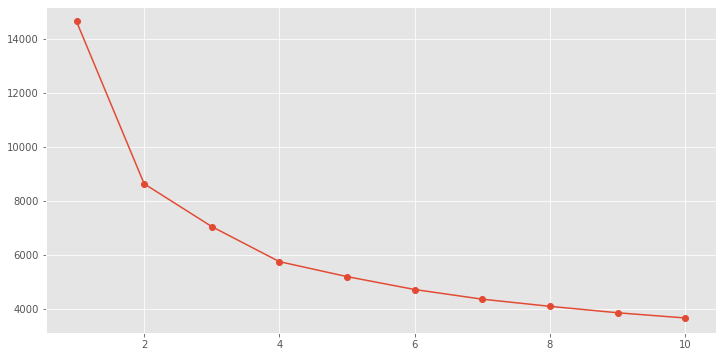

In [22]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df['number of clusters'], clusters_df['error'], marker = "o" )

### Find out the optimal value of K

In [23]:
## we now understand that K = 4

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [25]:
model_algo = KMeans( 4,n_init = 5, random_state=2)
model_algo.fit(vehicles_df_standardized)
centroids = model_algo.cluster_centers_

In [26]:
centroids

array([[-9.15758407e-01, -5.22402678e-01, -8.89505987e-01,
        -1.08772789e+00, -5.61970783e-01, -3.00015871e-01,
        -7.79778853e-01,  8.67364185e-01, -7.45939378e-01,
        -4.85536418e-01, -8.01746438e-01, -7.83836827e-01,
        -3.90574645e-01,  7.83159216e-01, -9.02385712e-02,
        -2.96089665e-01, -1.04774549e+00, -1.10361198e+00],
       [ 1.15442786e+00,  1.18428647e+00,  1.21198691e+00,
         9.73321772e-01,  9.49213388e-02,  2.18659142e-01,
         1.29796844e+00, -1.21424667e+00,  1.30184458e+00,
         1.09830595e+00,  1.20590258e+00,  1.30898668e+00,
         1.09121291e+00, -1.07878646e-01,  1.68326262e-01,
         2.67954844e-01,  4.67043879e-03,  1.90327006e-01],
       [-2.28397024e-01, -5.77112825e-01, -3.08062421e-01,
        -4.12415311e-02,  1.78444965e-01, -1.73698681e-01,
        -4.56879712e-01,  3.21990722e-01, -4.85591783e-01,
        -5.39969043e-01, -4.21528655e-01, -4.61480779e-01,
        -6.05499266e-01, -6.42849115e-01, -6.23412553e

### 7. Store the centroids in a dataframe with column names from the original dataset given 

Hint: Use pd.Dataframe function 

In [27]:
centroid_df = pd.DataFrame(centroids, columns = list(vehicles_df_standardized))

In [28]:
centroid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  4 non-null      float64
 1   circularity                  4 non-null      float64
 2   distance_circularity         4 non-null      float64
 3   radius_ratio                 4 non-null      float64
 4   pr.axis_aspect_ratio         4 non-null      float64
 5   max.length_aspect_ratio      4 non-null      float64
 6   scatter_ratio                4 non-null      float64
 7   elongatedness                4 non-null      float64
 8   pr.axis_rectangularity       4 non-null      float64
 9   max.length_rectangularity    4 non-null      float64
 10  scaled_variance              4 non-null      float64
 11  scaled_variance.1            4 non-null      float64
 12  scaled_radius_of_gyration    4 non-null      float64
 13  scaled_radius_of_gyratio

### Use kmeans.labels_ function to print out the labels of the classes

In [35]:
df_labels = pd.DataFrame(model_algo.labels_ , columns = list(['labels']))
df_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   labels  813 non-null    int32
dtypes: int32(1)
memory usage: 3.3 KB


In [36]:
df_labels['labels'] = df_labels['labels'].astype('category')
df_labels

,labels
0,2
1,2
2,1
3,2
4,3
...,...
808,2
809,2
810,1
811,2


## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [40]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html

### 9. Combine all three arrays a,b,c into a dataframe

In [41]:
frames = [a, b, c]
result = np.concatenate(frames)
seededData = pd.DataFrame(result)


In [42]:
seededData

,0,1
0,13.882785,4.438501
1,11.687256,1.250981
2,10.316397,1.449346
3,9.837412,-2.041974
4,8.691601,-4.289773
...,...,...
245,9.248848,24.346291
246,6.958291,16.448655
247,11.260042,20.333577
248,6.889835,21.238297


### 10. Use scatter matrix to print all the 3 distributions

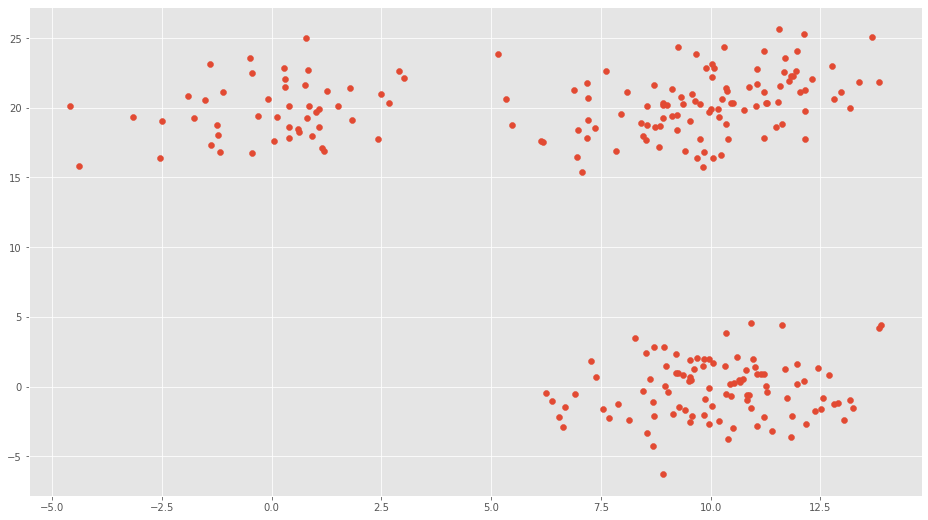

In [43]:
plt.scatter(seededData[0],seededData[1])

### 11. Find out the linkage matrix

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

Use ward as linkage metric and distance as Eucledian

In [45]:
linkageM = linkage(seededData, method='ward', metric='euclidean')

In [46]:
linkageM

array([[6.00000000e+00, 3.50000000e+01, 4.03105214e-02, 2.00000000e+00],
       [1.59000000e+02, 2.47000000e+02, 4.15336058e-02, 2.00000000e+00],
       [1.90000000e+02, 2.14000000e+02, 4.23431904e-02, 2.00000000e+00],
       [1.50000000e+01, 5.50000000e+01, 5.03965285e-02, 2.00000000e+00],
       [2.30000000e+01, 9.70000000e+01, 5.98615830e-02, 2.00000000e+00],
       [1.83000000e+02, 2.30000000e+02, 7.14307127e-02, 2.00000000e+00],
       [1.60000000e+02, 1.84000000e+02, 8.10640748e-02, 2.00000000e+00],
       [5.20000000e+01, 9.80000000e+01, 8.63310058e-02, 2.00000000e+00],
       [1.75000000e+02, 2.33000000e+02, 9.07935743e-02, 2.00000000e+00],
       [8.00000000e+00, 1.90000000e+01, 1.05398862e-01, 2.00000000e+00],
       [6.60000000e+01, 7.30000000e+01, 1.08977001e-01, 2.00000000e+00],
       [5.90000000e+01, 9.60000000e+01, 1.15828291e-01, 2.00000000e+00],
       [9.20000000e+01, 2.53000000e+02, 1.34937651e-01, 3.00000000e+00],
       [2.10000000e+02, 2.31000000e+02, 1.37055098e

### 12. Plot the dendrogram for the consolidated dataframe

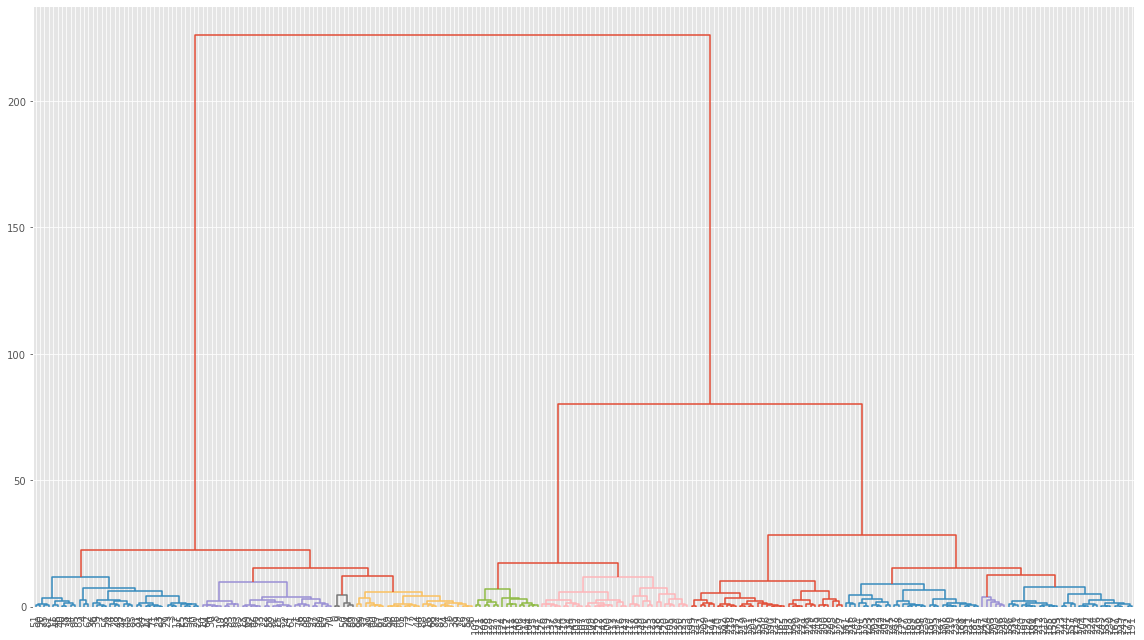

In [48]:
dendrogram(linkageM,leaf_rotation=90.0,p=25,color_threshold=12,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

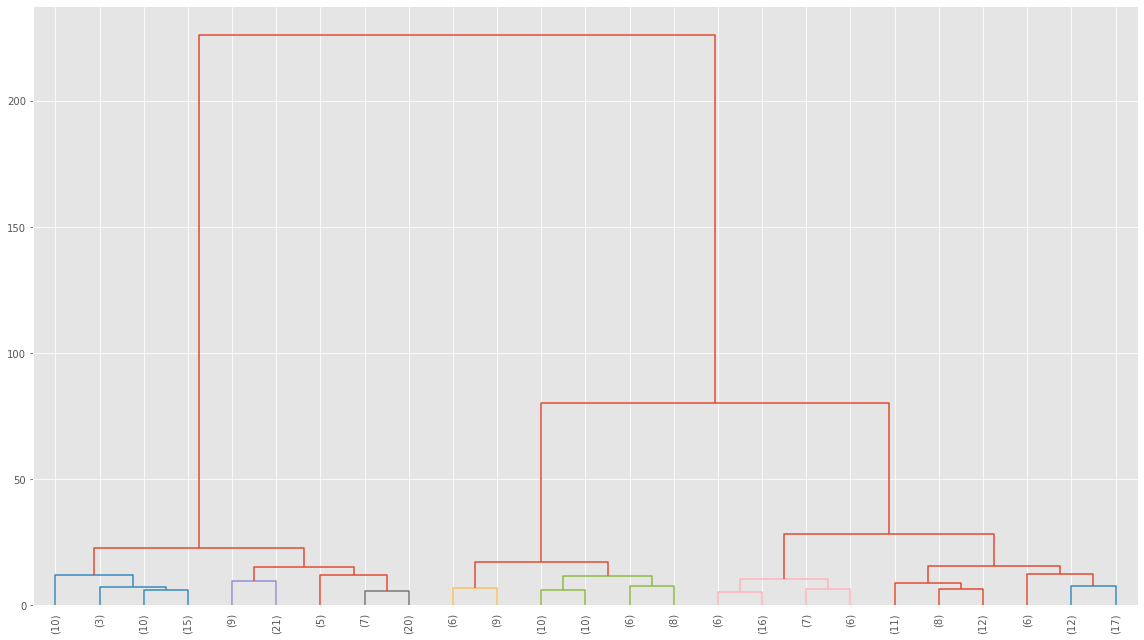

In [49]:
dendrogram(linkageM,leaf_rotation=90.0,p=25,color_threshold=12,leaf_font_size=10,truncate_mode='lastp')
plt.tight_layout()

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.fcluster.html

30 would be an optimal distance

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [60]:
k = fcluster(linkageM, t=30, criterion='distance')

In [61]:
k

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

### Use matplotlib to visually observe the clusters in 2D space 

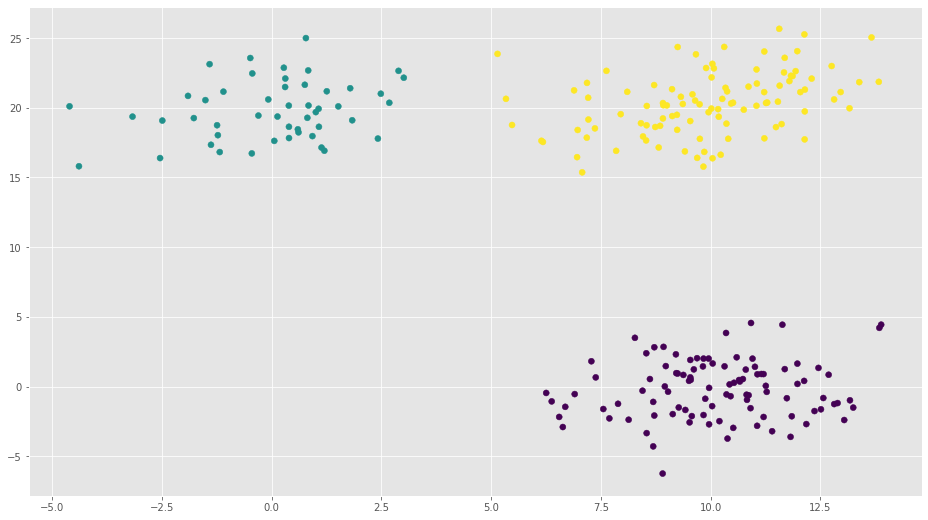

In [62]:
plt.scatter(seededData[0],seededData[1], c=k)